In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.animation as animation


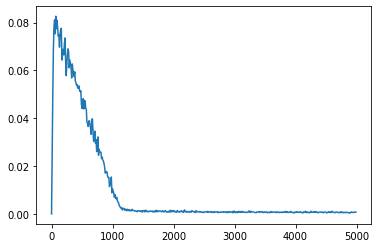

In [85]:
mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'])
plt.plot(mag.t, mag.M, '-')


In [83]:
min_mag=[np.min(df[df.t==t0].drop(columns=['t',]).values) for t0 in np.unique(pd.to_numeric(df.t, errors='coerce'))]

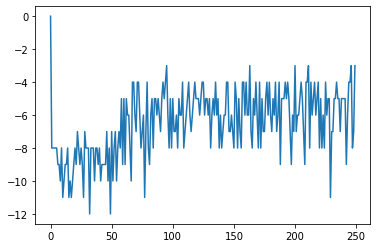

In [84]:
plt.plot(min_mag)

In [155]:
np.argsort(min_mag)[:10]

array([141,  72,  35,  63, 123, 121,  73, 184, 101,  34])

In [210]:
df=pd.read_csv('f_profiles_m.dat', sep=' ', names=['t']+[str(a) for a in np.arange(300)], index_col=False)

10 4980.06


Text(0.5, 1.0, '$t=4980.060000$')

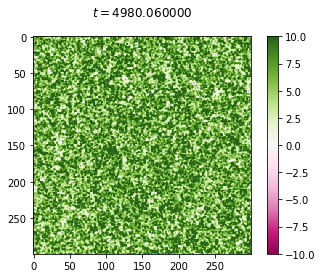

In [211]:
kt=-1
v0=10
t0=np.unique(pd.to_numeric(df.t, errors='coerce'))[kt]
print(v0, t0)
X=df[df.t==t0].drop(columns=['t',])

cmap = plt.get_cmap('PiYG')
#cmap.set_under('black')

plt.imshow(X, cmap=cmap, vmin=-v0, vmax=v0)
cbar = plt.colorbar()


plt.title(r'$t=%f$'%t0, pad=20)


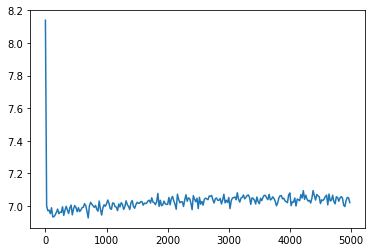

In [212]:
abs_t=np.unique(pd.to_numeric(df.t, errors='coerce'))
plt.plot(abs_t, [np.mean(df[df.t==t0].drop(columns=['t',]).values) for t0 in abs_t])

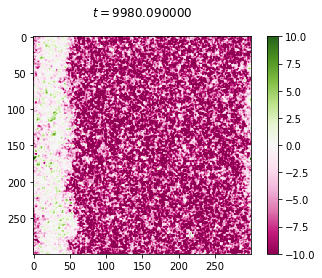

In [209]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('PiYG')

kt=0
t0=np.unique(df.t)[kt]

X_m=df[df.t==t0].drop(columns=['t'])

im = plt.imshow(X_m, cmap=cmap, vmin=-v0, vmax=v0)
plt.colorbar()
plt.title(r'$t=%f$'%t0, pad=20)

def update(*args):
    global kt

    t0=np.unique(df.t)[kt]
    X_m=df[df.t==t0].drop(columns=['t'])
    
    im.set_array(X_m)
    plt.title(r'$t=%f$'%t0, pad=20)
    
    kt += 1

    return im,

ani = animation.FuncAnimation(fig, update, np.unique(df.t).shape[0]-2)
writer = animation.ImageMagickFileWriter(fps=20)
ani.save('spontaneous_revs_D0.12_beta1.8_rho8.14_eps1.gif', writer=writer) 

# Spontaneous reversals

In [227]:
i_rev_list=[]
for i in range(100):
    try:
        mag=pd.read_csv('destab_eps1/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
        i_rev_list.append(i)
    except:
        pass

In [228]:
i_rev_list

[0, 1, 3, 5, 7, 28, 30]

In [240]:
list_td=[]
for i in i_rev_list:
    mag=pd.read_csv('destab_eps1/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
    list_td.append(mag.t[np.where(mag.M<0.5)[0][0]])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [222]:
len(list_td)

7

In [223]:
np.mean(list_td)

10.204741999999998

In [245]:
i=28
L=100
#df_m=pd.read_csv('destab_eps1/i%d/f_profiles.dat'%(i), sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_eps1/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])


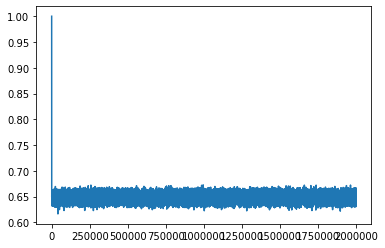

In [246]:
plt.plot(mag.t, mag.M, '-')
#plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

1999800.04 1.95376


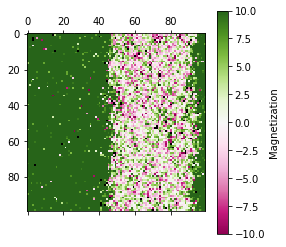

In [239]:
kt=-2
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t'])
print(t0, np.sum(X_m.values)/(5*100*100))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

cbar = plt.colorbar(img)
cbar.set_label('Magnetization')


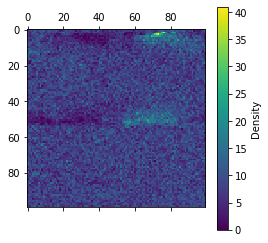

In [69]:
kt=50
t0=np.unique(df_m.t)[kt]
X_rho=df_rho[df_rho.t==t0].drop(columns=['t'])
plt.matshow(X_rho)

cbar = plt.colorbar()
cbar.set_label('Density')


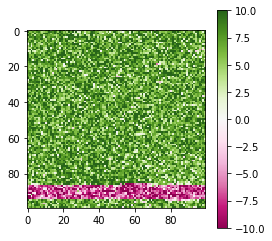

In [199]:

fig, ax = plt.subplots(figsize=(4, 4))

v0=10

kt=600
t0=np.unique(df_m.t)[kt]

X_m=df_m[df_m.t==t0].drop(columns=['t'])

im = plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

def update(*args):
    global kt

    t0=np.unique(df_m.t)[kt]
    X_m=df_m[df_m.t==t0].drop(columns=['t'])
    
    im.set_array(X_m)

    kt += 1

    return im,

ani = animation.FuncAnimation(fig, update, 200)
writer = animation.ImageMagickFileWriter(fps=20)
ani.save('rev3.gif', writer=writer) 

In [ ]:
for i in 